In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import missingno as msno
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [10]:
data=pd.read_csv('diabetes.csv')

In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data.shape

(768, 9)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


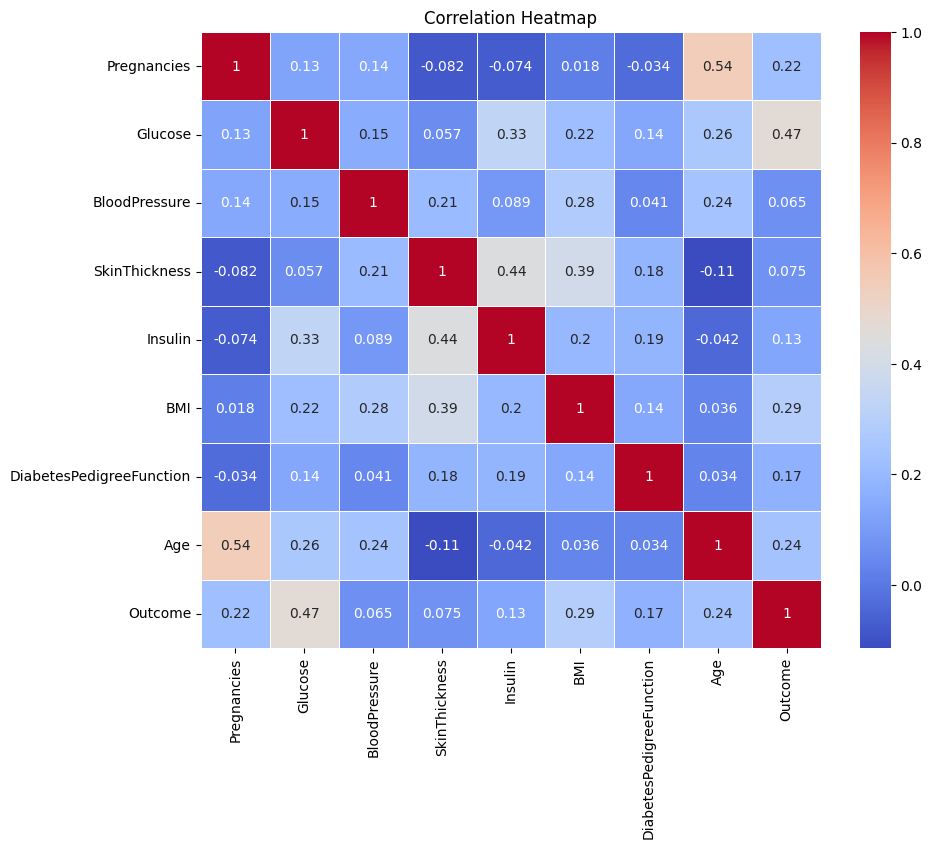

In [17]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
data_null=(data==0).sum()
print(data_null)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [20]:
#handle 0 in Glucose
median_value=data[data['Glucose']!=0]['Glucose'].median()
data['Glucose']=data['Glucose'].replace(0,median_value)

In [21]:
#handle 0 in Blood Pressure & BMI
mean_bloodpressure = data[data['BloodPressure'] != 0]['BloodPressure'].mean()
mean_bmi = data[data['BMI'] != 0]['BMI'].mean()
data['BloodPressure'] = data['BloodPressure'].replace(0, mean_bloodpressure)
data['BMI'] = data['BMI'].replace(0, mean_bmi)

In [24]:
#handle 0 in SkinThickness
selected_data = data[['BloodPressure', 'BMI', 'SkinThickness']]

In [25]:
selected_data

,BloodPressure,BMI,SkinThickness
0,72.0,33.6,35
1,66.0,26.6,29
2,64.0,23.3,0
3,66.0,28.1,23
4,40.0,43.1,35
...,...,...,...
763,76.0,32.9,48
764,70.0,36.8,27
765,72.0,26.2,23
766,60.0,30.1,0


In [26]:
train_data = selected_data[
    (selected_data['SkinThickness'] != 0) &
    (selected_data['BMI'] != 0) &
    (selected_data['BloodPressure'] != 0)
]

In [27]:
x_train=train_data[['BloodPressure','BMI']]
y_train=train_data['SkinThickness']

In [28]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
predict_data = selected_data[selected_data['SkinThickness']==0]
X_predict = predict_data[['BloodPressure', 'BMI']]
predicted_skinthickness = model.predict(X_predict)

In [30]:
selected_data.loc[selected_data['SkinThickness']==0, 'SkinThickness'] = predicted_skinthickness

In [31]:
selected_data_zero=(selected_data==0).sum()
print(selected_data_zero)

BloodPressure    0
BMI              0
SkinThickness    0
dtype: int64


In [32]:
data['SkinThickness'] = data['SkinThickness'].mask(data['SkinThickness'] == 0, selected_data['SkinThickness'])

In [33]:
#handle 0 in insullin
dataset = data[['Glucose','BMI','DiabetesPedigreeFunction','Insulin']]

In [34]:
dataset

,Glucose,BMI,DiabetesPedigreeFunction,Insulin
0,148,33.6,0.627,0
1,85,26.6,0.351,0
2,183,23.3,0.672,0
3,89,28.1,0.167,94
4,137,43.1,2.288,168
...,...,...,...,...
763,101,32.9,0.171,180
764,122,36.8,0.340,0
765,121,26.2,0.245,112
766,126,30.1,0.349,0


In [37]:
Train_data = dataset[
    (dataset['Glucose'] != 0) &
    (dataset['BMI'] != 0) &
    (dataset['DiabetesPedigreeFunction'] != 0) &
    (dataset['Insulin'] != 0)
]

In [38]:
X_train=Train_data[['Glucose','BMI','DiabetesPedigreeFunction']]
Y_train=Train_data['Insulin']

In [39]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [40]:
Predict_Data = dataset[dataset['Insulin']==0]
XData_predict = Predict_Data[['Glucose','BMI','DiabetesPedigreeFunction']]
predicted_insullin = model.predict(XData_predict)

In [41]:
dataset.loc[dataset['Insulin']==0,'Insulin'] = predicted_insullin

In [42]:
dataset_zero=(dataset==0).sum()
print(dataset_zero)

Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Insulin                     0
dtype: int64


In [43]:
data['Insulin'] = data['Insulin'].mask(data['Insulin'] == 0,dataset['Insulin'])

In [44]:
data_null=(data==0).sum()
print(data_null)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


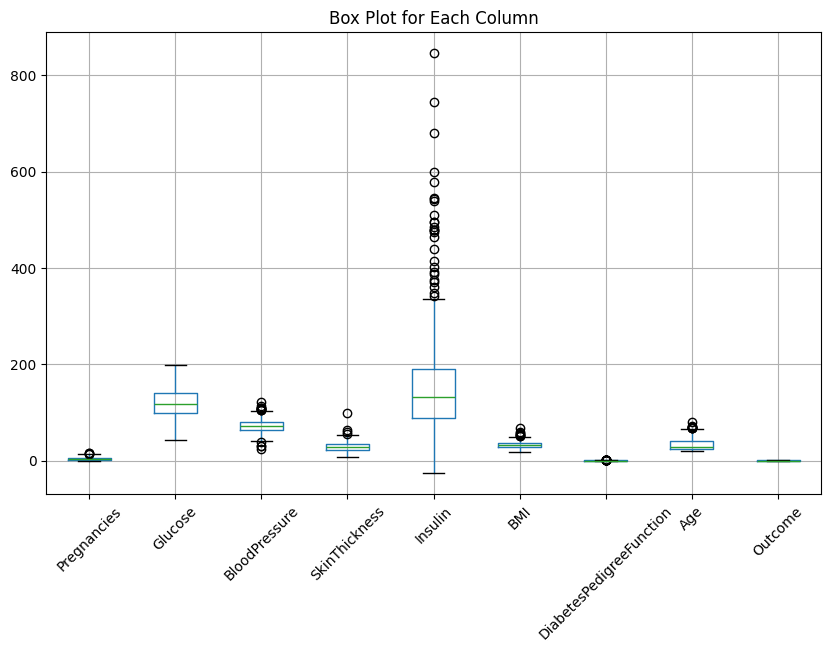

In [45]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plot for Each Column')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [46]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
Lower_Limit=np.percentile(data['Pregnancies'],5)
Upper_Limit=np.percentile(data['Pregnancies'],95)
data['Pregnancies']=np.clip(data['Pregnancies'],Lower_Limit,Upper_Limit)

In [48]:
Lower_Limit=np.percentile(data['Glucose'],5)
Upper_Limit=np.percentile(data['Glucose'],95)
data['Glucose']=np.clip(data['Glucose'],Lower_Limit,Upper_Limit)

In [49]:
Lower_Limit=np.percentile(data['BloodPressure'],5)
Upper_Limit=np.percentile(data['BloodPressure'],95)
data['BloodPressure']=np.clip(data['BloodPressure'],Lower_Limit,Upper_Limit)

In [50]:
Lower_Limit=np.percentile(data['SkinThickness'],5)
Upper_Limit=np.percentile(data['SkinThickness'],95)
data['SkinThickness']=np.clip(data['SkinThickness'],Lower_Limit,Upper_Limit)

In [51]:
Lower_Limit=np.percentile(data['Insulin'],5)
Upper_Limit=np.percentile(data['Insulin'],95)
data['Insulin']=np.clip(data['Insulin'],Lower_Limit,Upper_Limit)

In [52]:
Lower_Limit=np.percentile(data['BMI'],5)
Upper_Limit=np.percentile(data['BMI'],95)
data['BMI']=np.clip(data['BMI'],Lower_Limit,Upper_Limit)

In [53]:
Lower_Limit=np.percentile(data['DiabetesPedigreeFunction'],5)
Upper_Limit=np.percentile(data['DiabetesPedigreeFunction'],95)
data['DiabetesPedigreeFunction']=np.clip(data['DiabetesPedigreeFunction'],Lower_Limit,Upper_Limit)

In [54]:
Lower_Limit=np.percentile(data['Age'],5)
Upper_Limit=np.percentile(data['Age'],95)
data['Age']=np.clip(data['Age'],Lower_Limit,Upper_Limit)

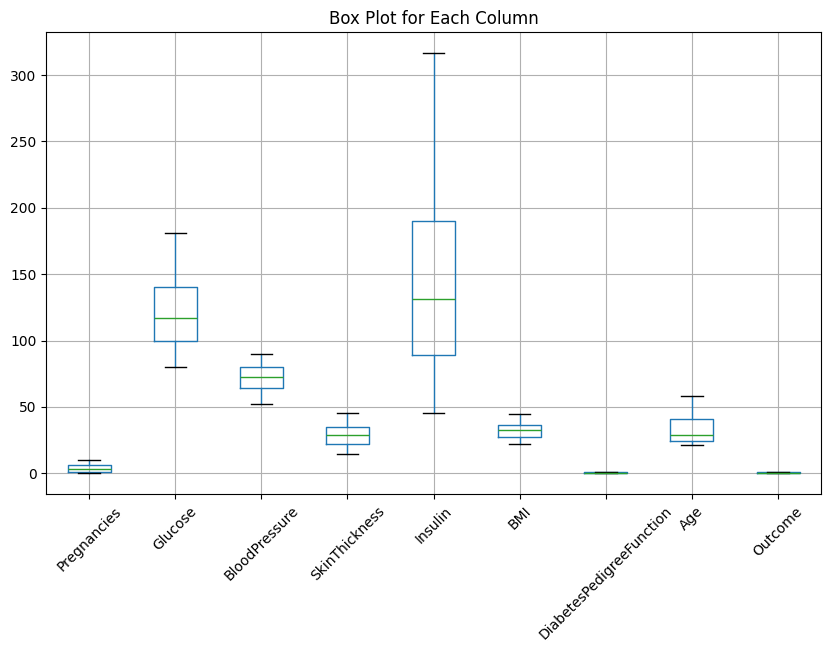

In [55]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plot for Each Column')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [56]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,212.027675,33.6,0.62700,50,1
1,1,85,66.0,29.000000,61.402568,26.6,0.35100,31,0
2,8,181,64.0,19.605112,268.826034,23.3,0.67200,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.16700,21,0
4,0,137,52.0,35.000000,168.000000,43.1,1.13285,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,45.000000,180.000000,32.9,0.17100,58,0
764,2,122,70.0,27.000000,158.569713,36.8,0.34000,27,0
765,5,121,72.0,23.000000,112.000000,26.2,0.24500,30,0
766,1,126,60.0,26.143340,155.190774,30.1,0.34900,47,1


In [57]:
data.shape

(768, 9)

In [58]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [59]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35.000000,212.027675,33.6,0.62700,50
1,1,85,66.0,29.000000,61.402568,26.6,0.35100,31
2,8,181,64.0,19.605112,268.826034,23.3,0.67200,32
3,1,89,66.0,23.000000,94.000000,28.1,0.16700,21
4,0,137,52.0,35.000000,168.000000,43.1,1.13285,33
...,...,...,...,...,...,...,...,...
763,10,101,76.0,45.000000,180.000000,32.9,0.17100,58
764,2,122,70.0,27.000000,158.569713,36.8,0.34000,27
765,5,121,72.0,23.000000,112.000000,26.2,0.24500,30
766,1,126,60.0,26.143340,155.190774,30.1,0.34900,47


In [60]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [62]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [63]:
x=pd.DataFrame(X_scaled,columns=x.columns)

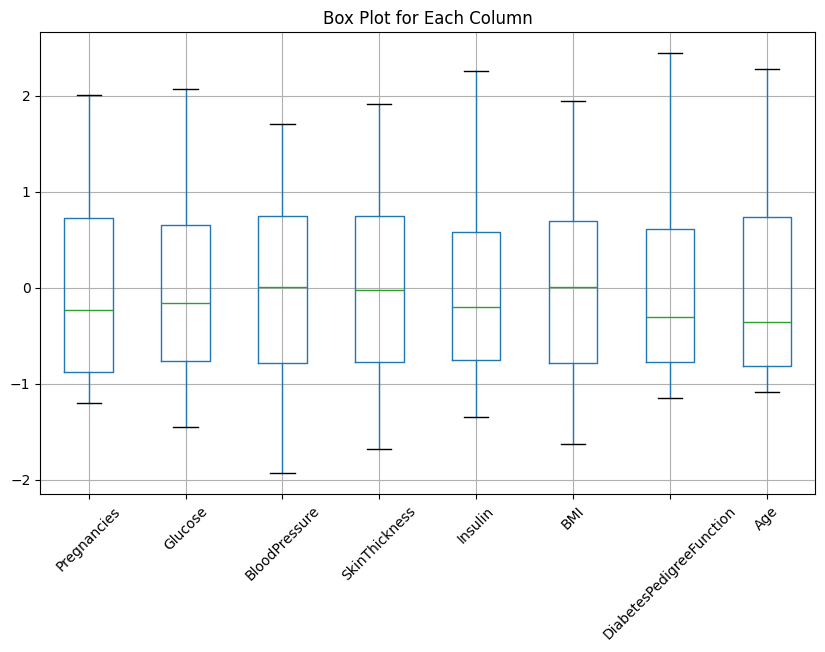

In [64]:
plt.figure(figsize=(10, 6))
x.boxplot()
plt.title('Box Plot for Each Column')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [65]:
X_Train, X_Test, Y_Train,Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
model = LogisticRegression()
model.fit(X_Train,Y_Train)

LogisticRegression()

In [67]:
y_pred_train = model.predict(X_Train)
accuracy = accuracy_score(Y_Train, y_pred_train)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.69%


In [68]:
y_pred = model.predict(X_Test)
accuracy = accuracy_score(Y_Test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 74.68%
